In [1]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text

from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
#from sklearn.tree import export_graphviz
import sklearn.metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import prepare


Loan Prediction

https://www.kaggle.com/altruistdelhite04/loan-prediction-problem-dataset

Project idea: The idea behind this ML project is to build a model that will classify how much loan the user can take. It is based on the user’s marital status, education, number of dependents, and employments. We can build a linear model for this project.

# Acquire

In [2]:
df1 = pd.read_csv('loan.csv')

In [3]:
df2 = pd.read_csv('loan2.csv')

In [4]:
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df1.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df2.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [7]:
df2.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [8]:
df1.shape

(614, 13)

In [9]:
df2.shape

(367, 12)

In [11]:
df =pd.concat([df1,df2])

In [12]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [13]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


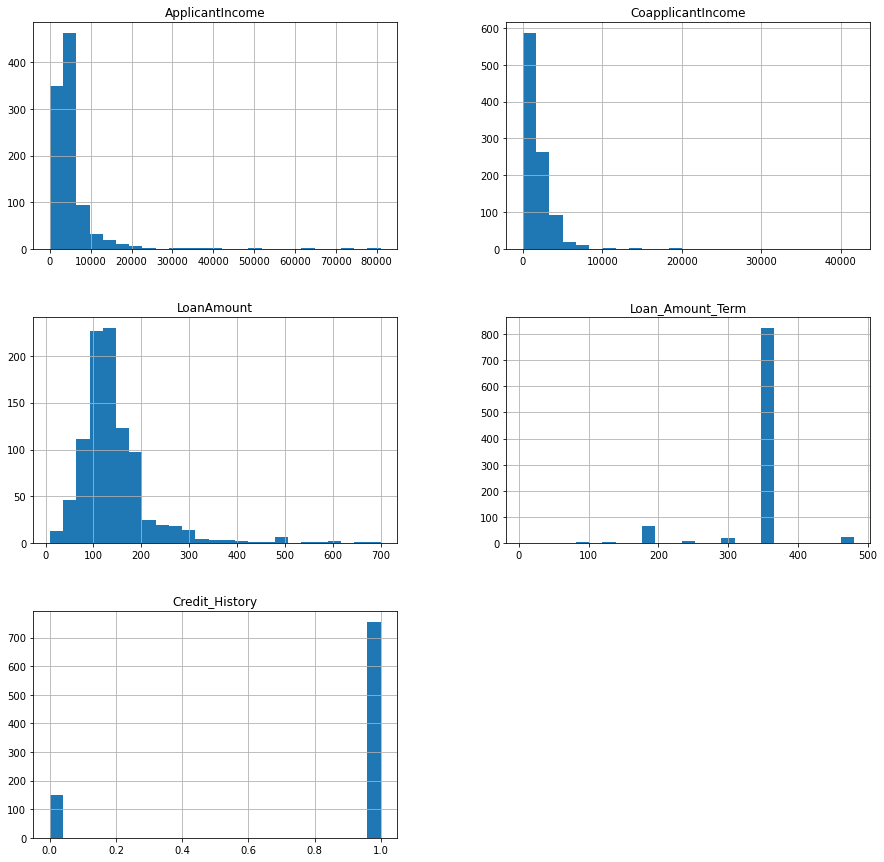

In [14]:
%matplotlib inline 

df.hist(bins=25, figsize=(15,15))
plt.show()

### Takeaways
- I pulled in 2 csv's with 980 rows with each row representing an applicant
- The loan amount is equally distributed
- The applicantincome is right skewed

# Prepare

In [15]:
#     miss_mean_imputer = Imputer(missing_values='NaN', strategy='mean', axis=0)

#     miss_mean_imputer = miss_mean_imputer.fit(df)

#     imputed_df = miss_mean_imputer.transform(df.values)

#     print(imputed_df)

In [16]:
# rename column
df = df.rename(columns={'ApplicantIncome': "Applicant_Income",'CoapplicantIncome': "Coapplicant_Income", 'LoanAmount':"Loan_Amount"})

In [17]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Applicant_Income', 'Coapplicant_Income',
       'Loan_Amount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status'],
      dtype='object')

In [18]:
df.isna().sum()

Loan_ID                 0
Gender                 24
Married                 3
Dependents             25
Education               0
Self_Employed          55
Applicant_Income        0
Coapplicant_Income      0
Loan_Amount            27
Loan_Amount_Term       20
Credit_History         79
Property_Area           0
Loan_Status           367
dtype: int64

In [19]:
# set loan id as index
df = df.set_index('Loan_ID')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 981 entries, LP001002 to LP002989
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              957 non-null    object 
 1   Married             978 non-null    object 
 2   Dependents          956 non-null    object 
 3   Education           981 non-null    object 
 4   Self_Employed       926 non-null    object 
 5   Applicant_Income    981 non-null    int64  
 6   Coapplicant_Income  981 non-null    float64
 7   Loan_Amount         954 non-null    float64
 8   Loan_Amount_Term    961 non-null    float64
 9   Credit_History      902 non-null    float64
 10  Property_Area       981 non-null    object 
 11  Loan_Status         614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 99.6+ KB


In [21]:
# check for nulls
df.isna().sum()

Gender                 24
Married                 3
Dependents             25
Education               0
Self_Employed          55
Applicant_Income        0
Coapplicant_Income      0
Loan_Amount            27
Loan_Amount_Term       20
Credit_History         79
Property_Area           0
Loan_Status           367
dtype: int64

In [22]:
# drop nulls in all but loan status
df = df.dropna(subset=['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Applicant_Income', 'Coapplicant_Income',
       'Loan_Amount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area'])

In [23]:
df.shape

(769, 12)

In [24]:
df = df.dropna()

In [25]:
df.shape

(480, 12)

In [26]:
# remove duplicates
df.drop_duplicates(keep=False,inplace=True)

In [27]:
df.shape
# so there are no duplicates

(480, 12)

In [28]:
df.dtypes

Gender                 object
Married                object
Dependents             object
Education              object
Self_Employed          object
Applicant_Income        int64
Coapplicant_Income    float64
Loan_Amount           float64
Loan_Amount_Term      float64
Credit_History        float64
Property_Area          object
Loan_Status            object
dtype: object

Encode

In [29]:
# Encoding categorical data
# Encoding the Independent Variable
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()

In [30]:
# I am going to loop through each col of the type object and encode
for col in df.select_dtypes(include = 'object'):
    df[col]=labelencoder_X.fit_transform(df[col]) 

Split

In [31]:
train, validate, test = prepare.train_validate_test_split(df, 'Loan_Status')

In [32]:
# here I split into my features and target
y_train = train[['Loan_Status']]
X_train = train.drop(columns= 'Loan_Status')
y_validate = validate[['Loan_Status']]
X_validate = validate.drop(columns= 'Loan_Status')
y_test = test[['Loan_Status']]
X_test = test.drop(columns= 'Loan_Status')

In [33]:
df.shape

(480, 12)

In [34]:
# time to scale
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_validate = sc.transform(X_validate)
X_test = sc.transform(X_test)
df.loc[:, df.columns != "Loan_Status"] = sc.transform(df.loc[:, df.columns != "Loan_Status"])

In [35]:
df.isna().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Applicant_Income      0
Coapplicant_Income    0
Loan_Amount           0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [36]:
train.shape

(268, 12)

In [37]:
validate.shape

(116, 12)

In [38]:
test.shape

(96, 12)

In [39]:
# def prep_function(df_any):
#     # set loan id as index
#     df = df.set_index('Loan_ID')
#     # rename column
#     df = df.rename(columns={'ApplicantIncome': "Applicant_Income",'CoapplicantIncome': "Coapplicant_Income", 'LoanAmount':"Loan_Amount"})
#     # drop nulls in all but loan status
#     df = df.dropna(subset=['Gender', 'Married', 'Dependents', 'Education',
#        'Self_Employed', 'Applicant_Income', 'Coapplicant_Income',
#        'Loan_Amount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area'])
  
#     return df

In [129]:
# def encode(df):
#     # Encoding categorical data
#     # Encoding the Independent Variable
#     from sklearn.preprocessing import LabelEncoder
#     labelencoder_X = LabelEncoder()
#     # I am going to loop through each col of the type object and encode
#     for col in train.select_dtypes(include = 'object'):
#         train[col]=labelencoder_X.fit_transform(train[col]) 
#         validate[col]=labelencoder_X.fit_transform(validate[col]) 
#         test[col]=labelencoder_X.fit_transform(test[col]) 
#     return train, validate, test
    
# def split_2(train, validate, test)  
#     #split
#     train, validate, test = prepare.train_validate_test_split(df, 'Loan_Status')
#     # here I split into my features and target
#     y_train = train[['Loan_Status']]
#     X_train = train.drop(columns= 'Loan_Status')
#     y_validate = validate[['Loan_Status']]
#     X_validate = validate.drop(columns= 'Loan_Status')
#     y_test = test[['Loan_Status']]
#     X_test = test.drop(columns= 'Loan_Status')
#     return train, validate, test, y_train, X_train, y_validate, X_validate, y_test, X_test
    
# def scaling(X_train, X_validate, X_test) 
#     # time to scale features
#     from sklearn.preprocessing import StandardScaler
#     sc = StandardScaler()
#     X_train = sc.fit_transform(X_train)
#     X_validate = sc.transform(X_validate)
#     X_test = sc.transform(X_test)
#     return X_train, X_validate, X_test

# Explore

5 questions to explore:
  
    1. Is there a relationship between applicant income and loan approval - no
    2. Is there a relationship between gender and loan approval - no
    3. Is there a relationship between applicant income and loan amount -yes
    4. Is there a relationship between property area and loan approval -no
    5. Does loan amount have a relationship with loan approval- yes

In [41]:
df = df.rename(columns={'ApplicantIncome': "Applicant_Income",'CoapplicantIncome': "Coapplicant_Income", 'LoanAmount':"Loan_Amount"})

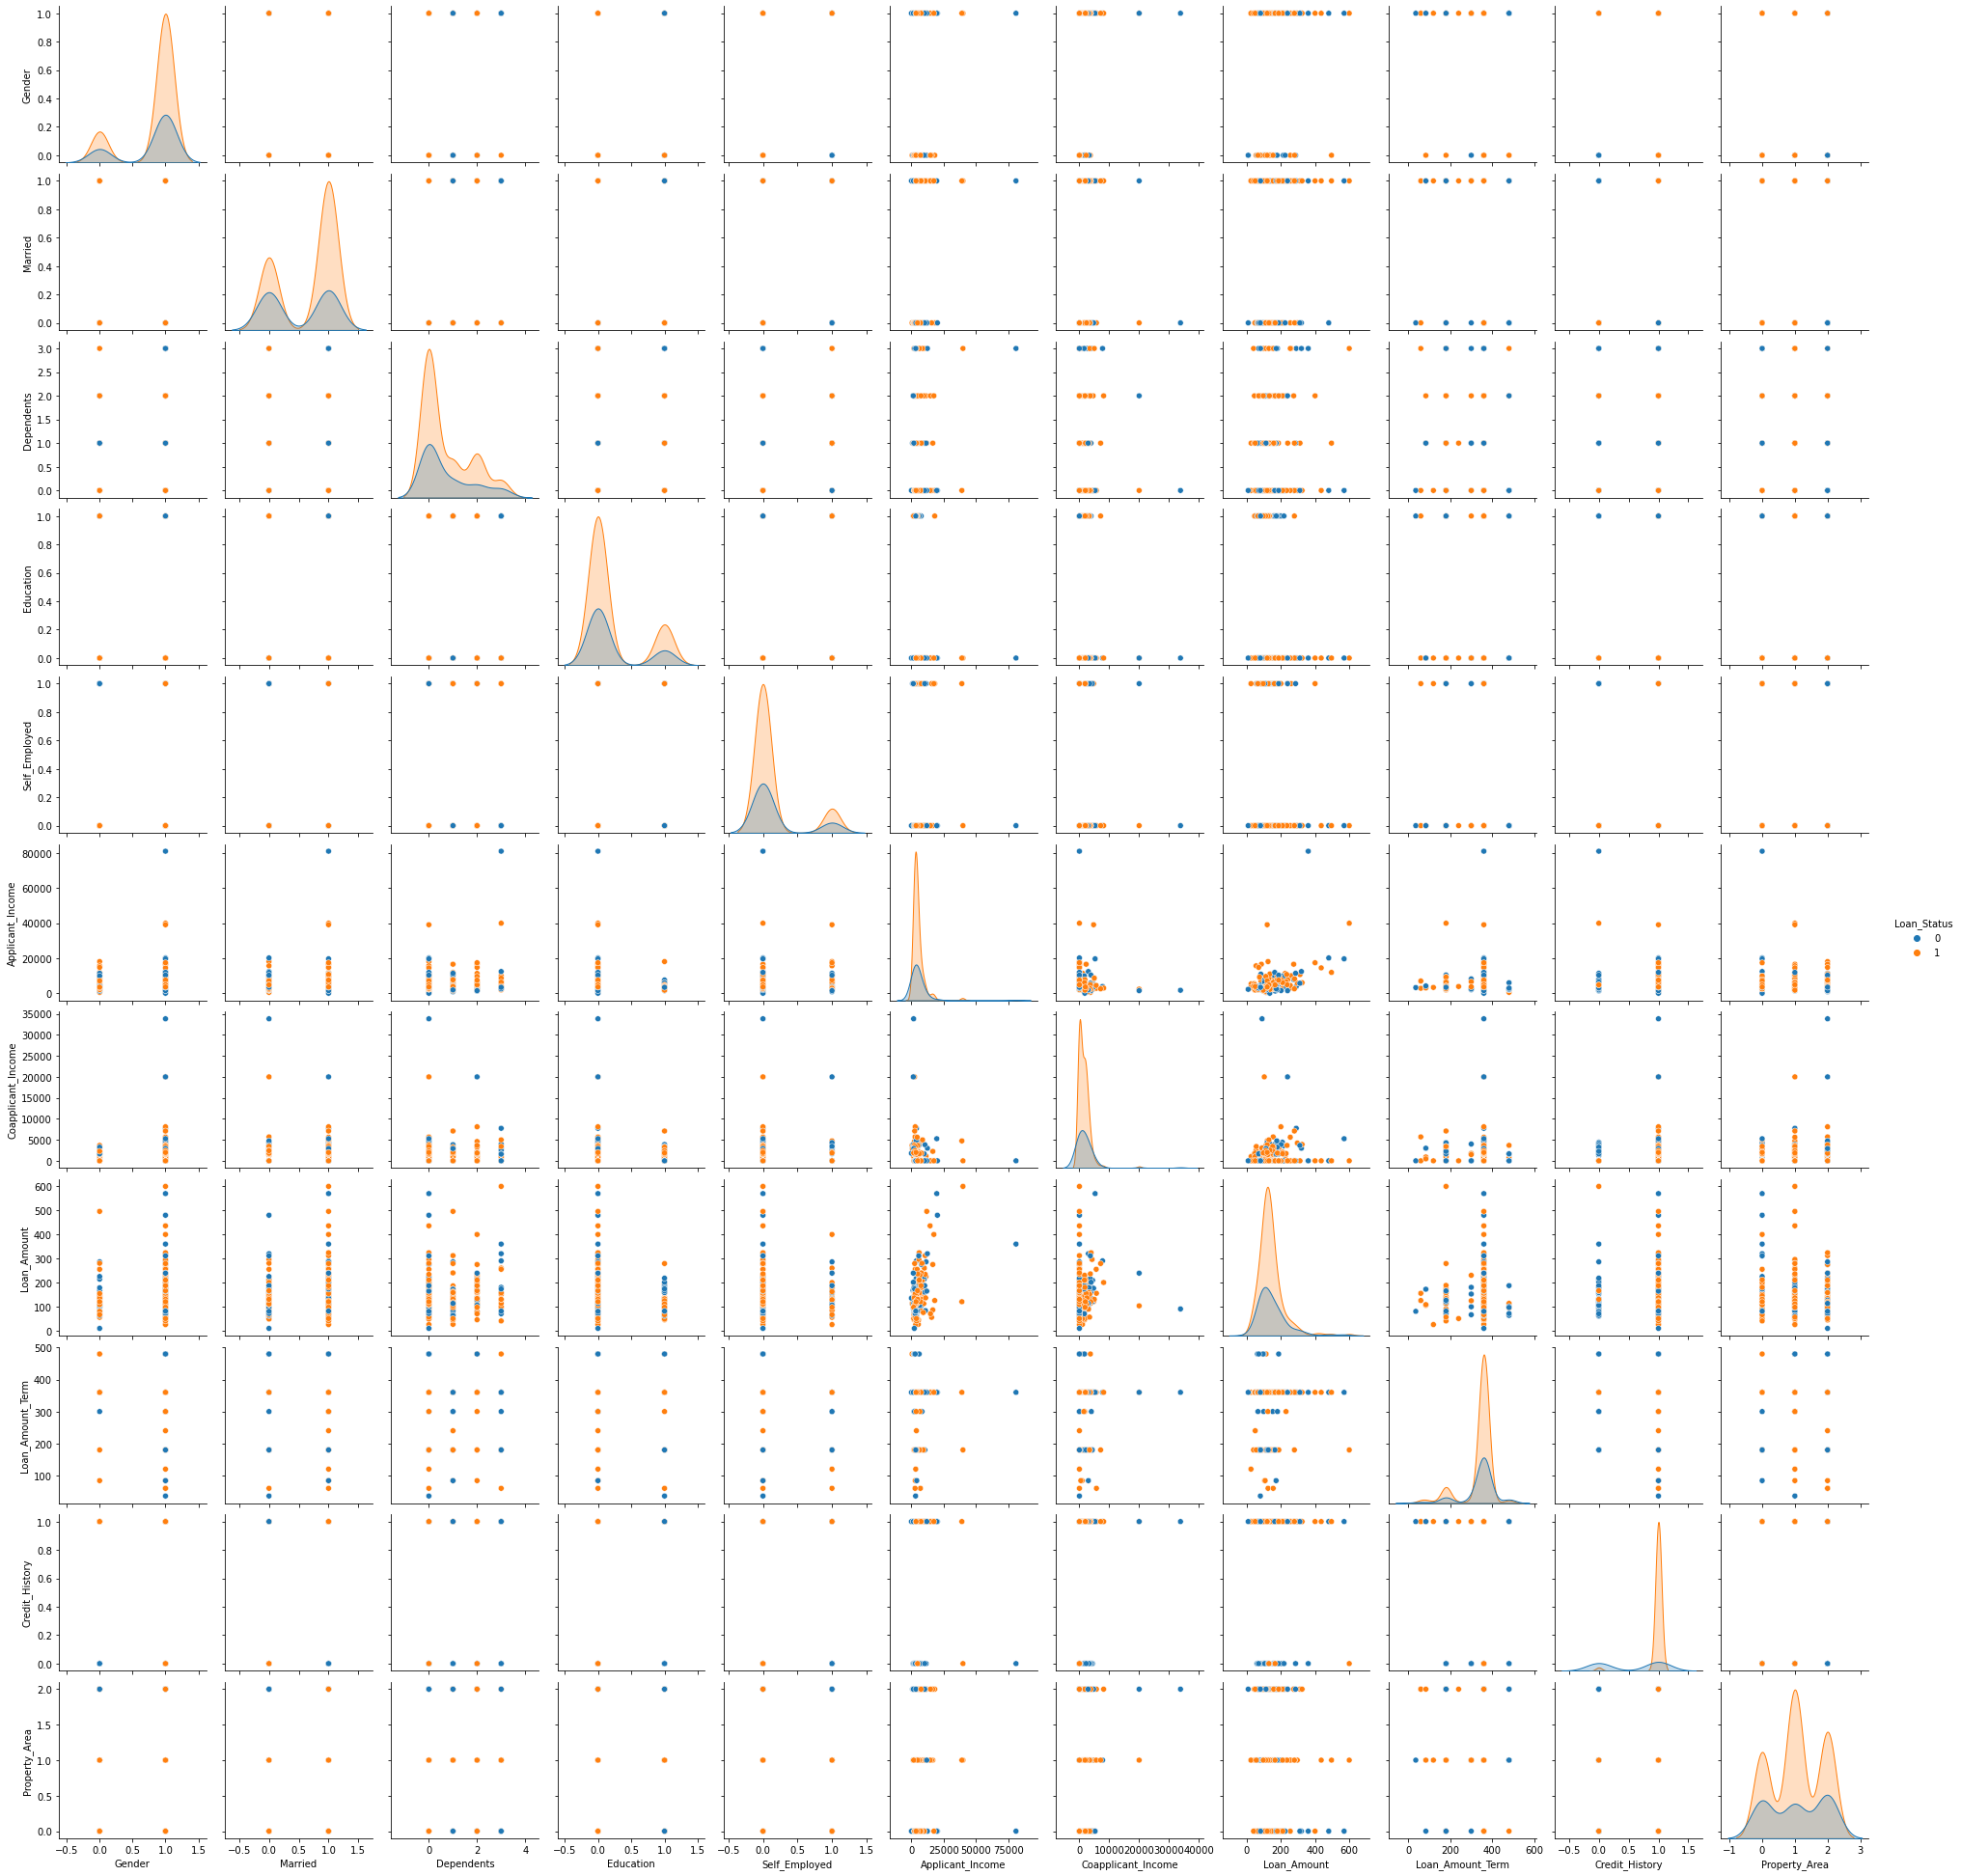

In [42]:
# Next I'll display some pairplots
sns.pairplot(train, hue='Loan_Status')
plt.show()

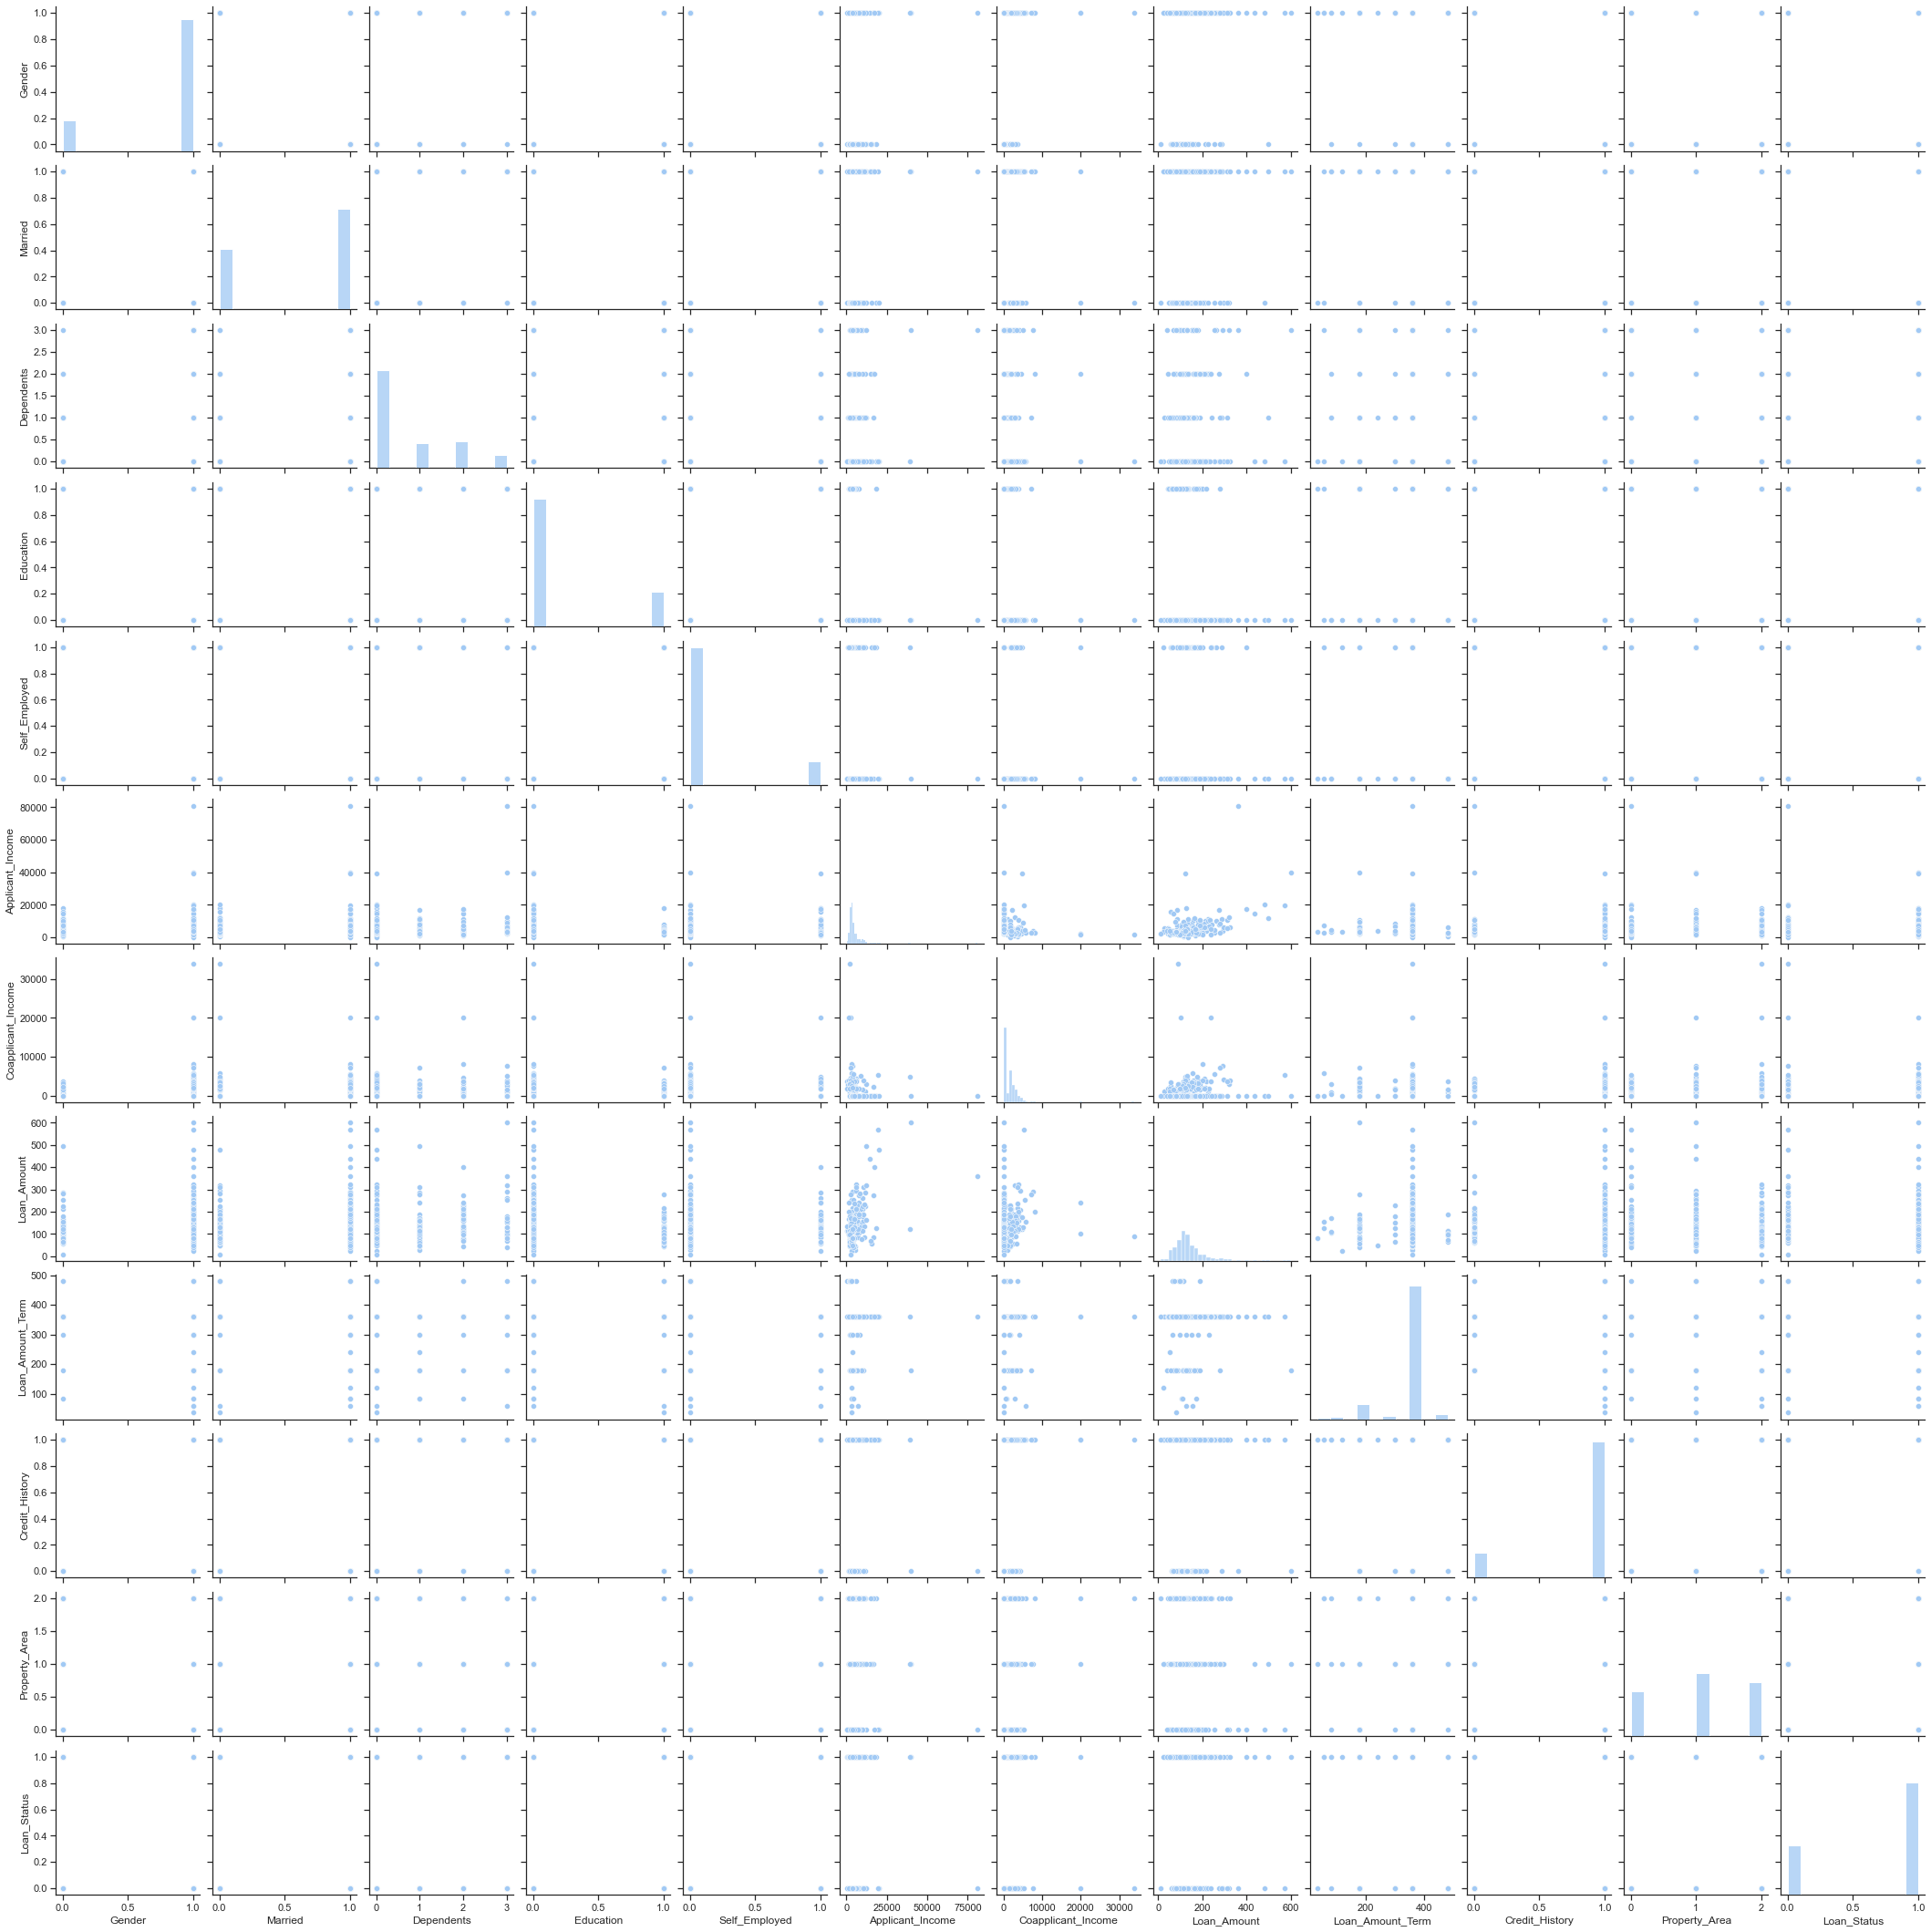

In [142]:
# Next I'll display some pairplots
sns.pairplot(train)
plt.show()

In [43]:
def get_status_heatmap(df):
    '''returns a heatmap with correlations'''
    plt.figure(figsize=(8,12))
    loan_heatmap = sns.heatmap(df.corr()[['Loan_Status']].sort_values(by='Loan_Status', ascending=False), vmin=-.5, vmax=.5, annot=True,cmap='flare')
    loan_heatmap.set_title('Features Correlated with Loan Status')

In [44]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001003,0.478913,0.777683,0.283345,-0.519752,-0.418854,-0.113711,-0.035233,-0.178884,0.31066,0.431092,-1.357521,0
LP001005,0.478913,0.777683,-0.715820,-0.519752,2.387467,-0.359549,-0.541201,-0.959229,0.31066,0.431092,1.213614,1
LP001006,0.478913,0.777683,-0.715820,1.923994,-0.418854,-0.424308,0.249960,-0.279574,0.31066,0.431092,1.213614,1
LP001008,0.478913,-1.285871,-0.715820,-0.519752,-0.418854,0.106347,-0.541201,-0.015263,0.31066,0.431092,1.213614,1
LP001011,0.478913,0.777683,1.282511,-0.519752,2.387467,0.015808,0.866650,1.570600,0.31066,0.431092,1.213614,1


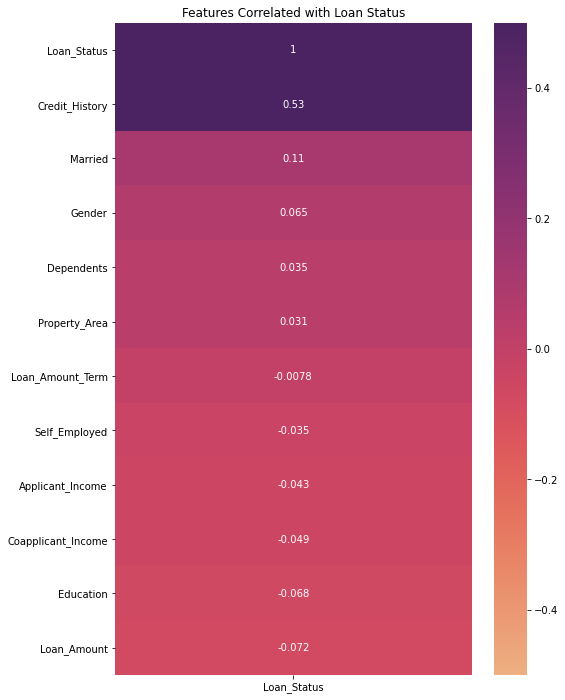

In [45]:
get_status_heatmap(df)

The above heatmap suggests very little correlation between applicant income and loan status contrary to my intial ideas

This answers the Questions: 1. Is there a relationship between applicant income and loan approval 

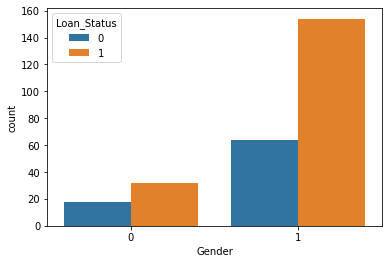

In [46]:
# plot senior_citizen by churn in a countplot
sns.countplot(data=train, x='Gender', hue='Loan_Status')
plt.show()

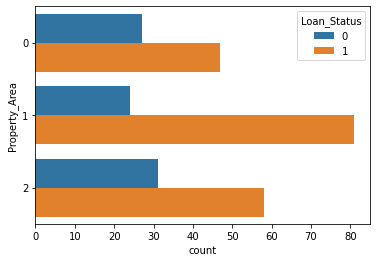

In [47]:
# plot senior_citizen by churn in a countplot
sns.countplot(data=train, y='Property_Area', hue='Loan_Status')
plt.show()

### Statistical Test
let's take this one step further to cement the relationship between loan status and property_area and run a chi2 test
H0: There is no association between property area and loan status
HA: There is an association between property area and loan status

In [48]:
a =.05

In [49]:
contingency_table = pd.crosstab(train.Property_Area, train.Loan_Status)
contingency_table

Loan_Status,0,1
Property_Area,,
0,27,47
1,24,81
2,31,58


In [50]:
test_results = stats.chi2_contingency(contingency_table)
test_results

(4.922318389025131,
 0.08533597261964072,
 2,
 array([[22.64179104, 51.35820896],
        [32.12686567, 72.87313433],
        [27.23134328, 61.76865672]]))

In [51]:
_, p, _, expected = test_results
p

0.08533597261964072

With a high p-value, we fail to reject the null hypothesis and accept there is an association between property area and loan status

This answers Question:
4. Is there a relationship between property area and loan approval 

In [52]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
LP001836,0,0,2,0,0,3427,0.0,138.0,360.0,1.0,2,0
LP002606,0,0,0,0,0,3159,0.0,100.0,360.0,1.0,1,1
LP002684,0,0,0,1,0,3400,0.0,95.0,360.0,1.0,0,0
LP002308,1,1,0,1,0,2167,2400.0,115.0,360.0,1.0,2,1


In [53]:
train['Applicant_Income'].head()

Loan_ID
LP001003    4583
LP001836    3427
LP002606    3159
LP002684    3400
LP002308    2167
Name: Applicant_Income, dtype: int64

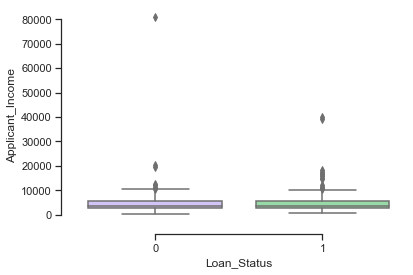

In [133]:
sns.set_theme(style="ticks", palette="pastel")


# Draw a nested boxplot 
sns.boxplot(x="Loan_Status", y="Applicant_Income",
            palette=["m", "g"],
            data=train)
sns.despine(offset=10, trim=True)

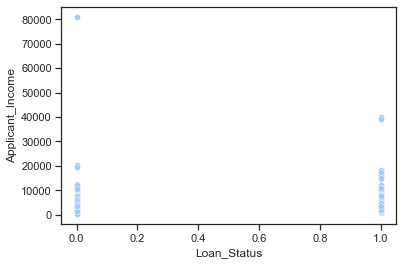

In [139]:
# use the scatterplot function to build the bubble map
sns.scatterplot(data=train, x="Loan_Status", y="Applicant_Income", legend=True, sizes=(20, 2000))

# show the graph
plt.show()

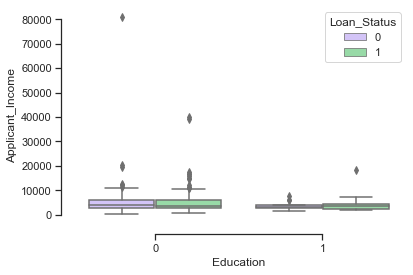

In [54]:
sns.set_theme(style="ticks", palette="pastel")


# Draw a nested boxplot 
sns.boxplot(x="Education", y="Applicant_Income",
            hue="Loan_Status", palette=["m", "g"],
            data=train)
sns.despine(offset=10, trim=True)

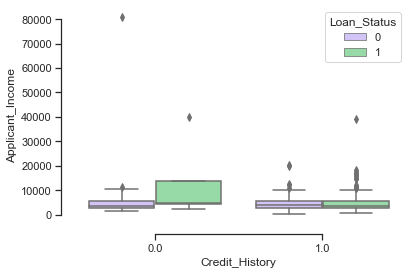

In [55]:
sns.set_theme(style="ticks", palette="pastel")


# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="Credit_History", y="Applicant_Income",
            hue="Loan_Status", palette=["m", "g"],
            data=train)
sns.despine(offset=10, trim=True)

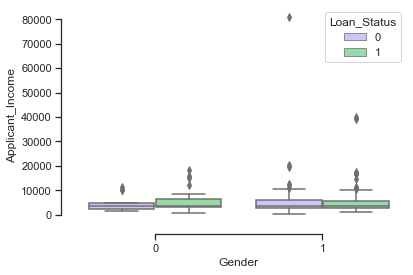

In [56]:
sns.set_theme(style="ticks", palette="pastel")


# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="Gender", y="Applicant_Income",
            hue="Loan_Status", palette=["m", "g"],
            data=train)
sns.despine(offset=10, trim=True)

### Statistical Test
-here I want to test if loan status is independent of gender using a Chi2 test
H0: Gender is independent of Loan status 
HA: Gender has a relationship with loan status

In [57]:
a = .05

In [58]:
contingency_table = pd.crosstab(train.Gender, train.Loan_Status)
contingency_table

Loan_Status,0,1
Gender,,
0,18,32
1,64,154


In [59]:
test_results = stats.chi2_contingency(contingency_table)
test_results

(0.561158470418679,
 0.4537938534984186,
 1,
 array([[ 15.29850746,  34.70149254],
        [ 66.70149254, 151.29850746]]))

In [60]:
_, p, _, expected = test_results
p > a

True

Since p > a is True we fail to reject H0 that gender is independent of loan status

This answers Question  2. Is there a relationship between gender and loan approval

### Statistical Test

-here I want compare two continuous variables and see if they are linearly correlated
using a Pearson r test
H0: Loan amount and applicant income has no linear correlation 
HA: Loan amount and applicant income have linear correlation 

In [61]:
a = .05

In [62]:
test_results = stats.pearsonr(train.Loan_Amount, train.Applicant_Income)
test_results

(0.4979008674539382, 3.3994686691534077e-18)

In [63]:
r, p = test_results

print(f'p is {p:.10f}')

p is 0.0000000000


-so we can reject the H0 and accept that these two variables are linearly correlated

This answers Question: 3. Is there a relationship between applicant income and loan amount

<AxesSubplot:xlabel='Loan_Amount', ylabel='Applicant_Income'>

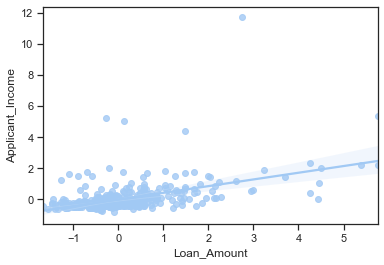

In [65]:
# use the function regplot to make a scatterplot
sns.regplot(x=df["Loan_Amount"], y=df["Applicant_Income"])

<AxesSubplot:xlabel='Loan_Amount', ylabel='Coapplicant_Income'>

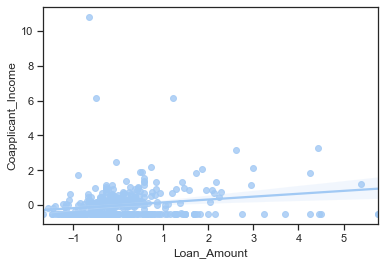

In [66]:
# use the function regplot to make a scatterplot
sns.regplot(x=df["Loan_Amount"], y=df["Coapplicant_Income"])

Takeaways
- The heatmap showed me the highest correlated features by far are Credit History and Married 
- From the pairplot I can see credit history has a relationship with loan status
- From the countplot I can being male has a relationship with loan status, I tested this with a Chi2 test and confirmed there is a relationship
- From another countplot I can see semi urban property area has a relationship with loan status, I tested this with a chi2 test and confirmed they do have a relationship
- From the boxplot I can see education probably has a weak relationship with loan status
- Another box plot surprised me showng that no credit has a relationship with loan status that was the opposite of what I expected to see
- From my scatter plot I can see loan amount and applicant income has a linear relationship, I tested this with a Pearson r test and found this to be true
- The next scatter plot shows me the coapplicant income is has a weaker linear relationship with the loan amount
- I was surprised to find the main driver of approval was credit, far outweighing the other features impact

# Model & Evaluate

For a classification problem, a common choice for the baseline model is a model that simply predicts the most common class every single time.

In [67]:
# Since yes is the most common status for loans I will set yes for all to  my baseline 
# model
baseline = train.Loan_Status.value_counts().nlargest(1)
baseline

1    186
Name: Loan_Status, dtype: int64

In [68]:
# Create my baseline model to have something to compare my future models
# to
baseline = train.Loan_Status.value_counts().nlargest(1) / train.shape[0]
print(f'My baseline accuracy is {round(baseline.values[0] * 100,2)}%.')

My baseline accuracy is 69.4%.


What do you care about?

Minimizing false positives --> Precision

Minimizing false negatives --> Recall

Both Precision and Recall --> F1 score

## Model 1
### Decision Tree

In [69]:
# create the model
clf = DecisionTreeClassifier(max_depth=3, random_state=123)

In [70]:
# fit the model
clf = clf.fit(X_train, y_train)

In [71]:
# make prediction on train obeservations
y_pred = clf.predict(X_train)
y_pred[0:5]

array([1, 1, 1, 1, 1])

In [72]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.84


In [73]:
# confusion matrix

confusion_matrix(y_train, y_pred)

array([[ 41,  41],
       [  3, 183]])

In [74]:
y_train.value_counts()

Loan_Status
1              186
0               82
dtype: int64

In [75]:
# labels = sorted(y_train.unique())

# pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=labels)

In [76]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.50      0.65        82
           1       0.82      0.98      0.89       186

    accuracy                           0.84       268
   macro avg       0.87      0.74      0.77       268
weighted avg       0.85      0.84      0.82       268



In [77]:
print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
     .format(clf.score(X_validate, y_validate)))

Accuracy of Decision Tree classifier on validate set: 0.79


In [78]:
#produce predictions
y_pred = clf.predict(X_validate)

#compare actual y values (from validate) to predicted y_values from the model run on X_validate
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.39      0.54        36
           1       0.78      0.97      0.87        80

    accuracy                           0.79       116
   macro avg       0.83      0.68      0.70       116
weighted avg       0.81      0.79      0.76       116



# Model 2
## Random Forest

In [79]:
#create the model
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=3,
                            n_estimators=100,
                            max_depth=3, 
                            random_state=123)

In [80]:
# fit the model
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, min_samples_leaf=3, random_state=123)

In [81]:
# evaluate the imporatance of each feature
print(rf.feature_importances_)

[0.01099697 0.05039509 0.01730651 0.00904017 0.01172781 0.12823028
 0.09583989 0.14093019 0.05444976 0.44065269 0.04043064]


In [82]:
#1 Credit_History     0.44065269
#2 Loan_Amount        0.14093019
#3 Applicant_Income   0.12823028
#4 Coapplicant_Income 0.09583989
#5 Loan_Amount_Term   0.05444976 
#6 Married            0.05039509   

In [83]:
# classify
y_pred = rf.predict(X_train)

In [84]:
# estimate the probabily of each outcome for loan status
y_pred_proba = rf.predict_proba(X_train)

In [85]:
# compute the accuracy
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.82


In [86]:
# print confusion matrix
print(confusion_matrix(y_train, y_pred))

[[ 39  43]
 [  4 182]]


In [87]:
# print classification report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.48      0.62        82
           1       0.81      0.98      0.89       186

    accuracy                           0.82       268
   macro avg       0.86      0.73      0.75       268
weighted avg       0.84      0.82      0.81       268



In [88]:
# Compute the accuracy of the model when run on the validate dataset
print('Accuracy of random forest classifier on validate set: {:.2f}'
     .format(rf.score(X_validate, y_validate)))

Accuracy of random forest classifier on validate set: 0.80


# Model 3
##  KNN

In [89]:
# create the object
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')

In [90]:
# fit the model on the training data
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [91]:
# estimate the probability of each outcome
y_pred_proba = knn.predict_proba(X_train)

In [92]:
# compute the accuracy of the model
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.82


In [93]:
# create a confusion matrix
print(confusion_matrix(y_train, y_pred))

[[ 39  43]
 [  4 182]]


In [94]:
# create a classification report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.48      0.62        82
           1       0.81      0.98      0.89       186

    accuracy                           0.82       268
   macro avg       0.86      0.73      0.75       268
weighted avg       0.84      0.82      0.81       268



In [95]:
# Compute the accuracy of the model when run on the validate dataset
print('Accuracy of KNN classifier on validate set: {:.2f}'
     .format(knn.score(X_validate, y_validate)))

Accuracy of KNN classifier on validate set: 0.78


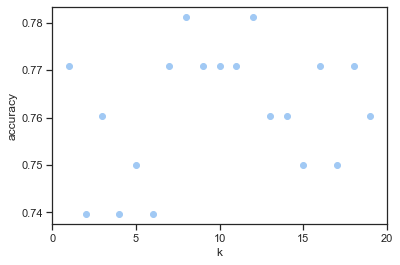

In [96]:
import matplotlib.pyplot as plt
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])
plt.show()

# Model 4
## Logistic Regression - C=1

In [97]:
# create the model
logit = LogisticRegression(C=1, class_weight={0:1, 1:99}, random_state=123, intercept_scaling=1, solver='lbfgs')

In [98]:
# fit the algorithm to the train data
logit.fit(X_train, y_train)

LogisticRegression(C=1, class_weight={0: 1, 1: 99}, random_state=123)

In [99]:
# print feature importance and evaluate the intercept of the model
print('Coefficient: \n', logit.coef_)
print('Intercept: \n', logit.intercept_)

Coefficient: 
 [[ 0.48302325 -0.12524874  0.09016065 -0.26034226 -0.35073286  0.16098367
  -0.53320595 -0.00943456 -0.41988824  1.90864438 -0.48424778]]
Intercept: 
 [5.53355802]


In [100]:
# estimate the probability of yes as an outcome
y_pred = logit.predict(X_train)

In [101]:
# evaluate by computing accuracy
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train, y_train)))

Accuracy of Logistic Regression classifier on training set: 0.72


In [102]:
print(confusion_matrix(y_train, y_pred))

[[  7  75]
 [  0 186]]


In [103]:
# print classification report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.09      0.16        82
           1       0.71      1.00      0.83       186

    accuracy                           0.72       268
   macro avg       0.86      0.54      0.49       268
weighted avg       0.80      0.72      0.63       268



# Model 5
## Logistic Regression - C=0.1

In [104]:
# create the model
logit2 = LogisticRegression(C=.1, class_weight={0:1, 1:99}, random_state=123, intercept_scaling=1, solver='lbfgs')

In [105]:
# fit the algorithm on the train data
logit2.fit(X_train, y_train)

LogisticRegression(C=0.1, class_weight={0: 1, 1: 99}, random_state=123)

In [106]:
# print feature importance and the intercept
print('Coefficient: \n', logit2.coef_)
print('Intercept: \n', logit2.intercept_)

Coefficient: 
 [[ 3.50443294e-01 -1.49247441e-03  4.42743168e-02 -1.96441229e-01
  -2.81389301e-01  1.24678949e-01 -4.37422891e-01  8.89780547e-03
  -2.89177785e-01  1.63082753e+00 -3.51377678e-01]]
Intercept: 
 [5.37888733]


In [107]:
# make predictions
y_pred2 = logit2.predict(X_train)

In [108]:
# compute accuracy
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit2.score(X_train, y_train)))

Accuracy of Logistic Regression classifier on training set: 0.69


In [109]:
print(confusion_matrix(y_train, y_pred2))

[[  0  82]
 [  0 186]]


In [110]:
# create a classification report
print(classification_report(y_train, y_pred2))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        82
           1       0.69      1.00      0.82       186

    accuracy                           0.69       268
   macro avg       0.35      0.50      0.41       268
weighted avg       0.48      0.69      0.57       268



In [111]:
#Evaluate on Out-of-Sample data

# make predictions
y_pred1 = logit.predict(X_validate)
y_pred2 = logit2.predict(X_validate)


print("Model 1: solver = lbfgs, c = 1")

# accuracy of model 1
print('Accuracy: {:.2f}'.format(logit.score(X_validate, y_validate)))

# confusion matrix of model 1
print(confusion_matrix(y_validate, y_pred1))

# classification report of model 1
print(classification_report(y_validate, y_pred1))

print("Model 2: solver = lbfgs, c = .1")

# accuracy of model 2
print('Accuracy: {:.2f}'.format(logit2.score(X_validate, y_validate)))

# confusion matrix of model 2
print(confusion_matrix(y_validate, y_pred2))

# classification report of model 2
print(classification_report(y_validate, y_pred2))

Model 1: solver = lbfgs, c = 1
Accuracy: 0.72
[[ 4 32]
 [ 0 80]]
              precision    recall  f1-score   support

           0       1.00      0.11      0.20        36
           1       0.71      1.00      0.83        80

    accuracy                           0.72       116
   macro avg       0.86      0.56      0.52       116
weighted avg       0.80      0.72      0.64       116

Model 2: solver = lbfgs, c = .1
Accuracy: 0.69
[[ 0 36]
 [ 0 80]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        36
           1       0.69      1.00      0.82        80

    accuracy                           0.69       116
   macro avg       0.34      0.50      0.41       116
weighted avg       0.48      0.69      0.56       116



Model 2 Random Forest performed the best in accuracy at 82 beating the baseline model at 69.4

### Test

In [112]:
# Compute the accuracy of the model when run on the test dataset
print('Accuracy of random forest classifier on validate set: {:.2f}'
     .format(rf.score(X_test, y_test)))

Accuracy of random forest classifier on validate set: 0.78


In [113]:
X = df.drop(columns="Loan_Status")

In [114]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,,,,,,,,,,,
LP001003,0.478913,0.777683,0.283345,-0.519752,-0.418854,-0.113711,-0.035233,-0.178884,0.31066,0.431092,-1.357521
LP001005,0.478913,0.777683,-0.715820,-0.519752,2.387467,-0.359549,-0.541201,-0.959229,0.31066,0.431092,1.213614
LP001006,0.478913,0.777683,-0.715820,1.923994,-0.418854,-0.424308,0.249960,-0.279574,0.31066,0.431092,1.213614
LP001008,0.478913,-1.285871,-0.715820,-0.519752,-0.418854,0.106347,-0.541201,-0.015263,0.31066,0.431092,1.213614
LP001011,0.478913,0.777683,1.282511,-0.519752,2.387467,0.015808,0.866650,1.570600,0.31066,0.431092,1.213614


In [115]:
#X.drop(columns=['Property_Area','Credit_History','Self_Employed','Education','Dependents','Married','Gender'])
X

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,,,,,,,,,,,
LP001003,0.478913,0.777683,0.283345,-0.519752,-0.418854,-0.113711,-0.035233,-0.178884,0.310660,0.431092,-1.357521
LP001005,0.478913,0.777683,-0.715820,-0.519752,2.387467,-0.359549,-0.541201,-0.959229,0.310660,0.431092,1.213614
LP001006,0.478913,0.777683,-0.715820,1.923994,-0.418854,-0.424308,0.249960,-0.279574,0.310660,0.431092,1.213614
LP001008,0.478913,-1.285871,-0.715820,-0.519752,-0.418854,0.106347,-0.541201,-0.015263,0.310660,0.431092,1.213614
LP001011,0.478913,0.777683,1.282511,-0.519752,2.387467,0.015808,0.866650,1.570600,0.310660,0.431092,1.213614
...,...,...,...,...,...,...,...,...,...,...,...
LP002978,-2.088061,-1.285871,-0.715820,-0.519752,-0.418854,-0.375078,-0.541201,-0.896298,0.310660,0.431092,-1.357521
LP002979,0.478913,0.777683,2.281677,-0.519752,-0.418854,-0.187788,-0.541201,-1.286471,-2.182061,0.431092,-1.357521
LP002983,0.478913,0.777683,0.283345,-0.519752,-0.418854,0.428126,-0.460675,1.394393,0.310660,0.431092,1.213614


In [116]:
# make a new column named prediction to hold the outcomes
df['prediction'] = rf.predict(X)

In [117]:
df.drop(columns="Loan_Status")

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,prediction
Loan_ID,,,,,,,,,,,,
LP001003,0.478913,0.777683,0.283345,-0.519752,-0.418854,-0.113711,-0.035233,-0.178884,0.310660,0.431092,-1.357521,1
LP001005,0.478913,0.777683,-0.715820,-0.519752,2.387467,-0.359549,-0.541201,-0.959229,0.310660,0.431092,1.213614,1
LP001006,0.478913,0.777683,-0.715820,1.923994,-0.418854,-0.424308,0.249960,-0.279574,0.310660,0.431092,1.213614,1
LP001008,0.478913,-1.285871,-0.715820,-0.519752,-0.418854,0.106347,-0.541201,-0.015263,0.310660,0.431092,1.213614,1
LP001011,0.478913,0.777683,1.282511,-0.519752,2.387467,0.015808,0.866650,1.570600,0.310660,0.431092,1.213614,1
...,...,...,...,...,...,...,...,...,...,...,...,...
LP002978,-2.088061,-1.285871,-0.715820,-0.519752,-0.418854,-0.375078,-0.541201,-0.896298,0.310660,0.431092,-1.357521,1
LP002979,0.478913,0.777683,2.281677,-0.519752,-0.418854,-0.187788,-0.541201,-1.286471,-2.182061,0.431092,-1.357521,1
LP002983,0.478913,0.777683,0.283345,-0.519752,-0.418854,0.428126,-0.460675,1.394393,0.310660,0.431092,1.213614,1


In [121]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Applicant_Income', 'Coapplicant_Income', 'Loan_Amount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'prediction'],
      dtype='object')

In [125]:
df = pd.DataFrame(sc.inverse_transform(X), index=df.index, columns=[df.columns.drop(['Loan_Status', 'prediction'])])

In [126]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,,,,,,,,,,,
LP001003,1.0,1.0,1.0,0.0,0.0,4583.0,1508.0,128.0,360.0,1.0,0.0
LP001005,1.0,1.0,0.0,0.0,1.0,3000.0,0.0,66.0,360.0,1.0,2.0
LP001006,1.0,1.0,0.0,1.0,0.0,2583.0,2358.0,120.0,360.0,1.0,2.0
LP001008,1.0,0.0,0.0,0.0,0.0,6000.0,0.0,141.0,360.0,1.0,2.0
LP001011,1.0,1.0,2.0,0.0,1.0,5417.0,4196.0,267.0,360.0,1.0,2.0


In [127]:
df["prediction"] = rf.predict(X)

In [128]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,prediction
Loan_ID,,,,,,,,,,,,
LP001003,1.0,1.0,1.0,0.0,0.0,4583.0,1508.0,128.0,360.0,1.0,0.0,1
LP001005,1.0,1.0,0.0,0.0,1.0,3000.0,0.0,66.0,360.0,1.0,2.0,1
LP001006,1.0,1.0,0.0,1.0,0.0,2583.0,2358.0,120.0,360.0,1.0,2.0,1
LP001008,1.0,0.0,0.0,0.0,0.0,6000.0,0.0,141.0,360.0,1.0,2.0,1
LP001011,1.0,1.0,2.0,0.0,1.0,5417.0,4196.0,267.0,360.0,1.0,2.0,1


In [ ]:
#df.to_csv('predictions.csv')